# High Dimension Space

Uptil now, we have seen implementations of MCMC and Gibbs Sampling, but these methods do not scale very well to higher dimensions. MCMC has trouble due to low acceptance, and Gibbs has issues with getting the conditional distributions.

Thus, we will take a detour and understand the geometry of High Dimensional parameter space, and how geometry frustrates efficient statistical computing.

## High Dimensional Integrals

We know that in bayesian inferencing, we develop a posterior pdf of the parameters based on a likelihood and a prior function.

$$
\pi(q|D) \propto \pi(D|q) \pi(q)
$$

but, the posterior distribution in itself is abstract and all well posed question to it reduce to expectations and consequently to **estimating High Dimensional Integrals**.

$$
\mathbb{E}_{\pi} [f] = \int_{Q} dq \; \pi(q) f(q)
$$

> Note that Q is the target sample space and the integral will not depend on any reparametrisation to $Q^{*}$.

One way to prevent computational inefficiency is to prevent wasting  computational resources evaluating the target density and relevant functions in regions of parameter space that have negligible contribution to the desired expectation.

Consequently, a common intuition is to focus on regions where the integrand is largest. This intuition suggests that we consider regions where the target density and target function take on their largest values. If we assume that the **target function is relatively uniform** (f(q)) (true in many cases, but not calculating Expectations), this leads us to do integration near the mode. But, in practise this fails spectacularly.

Expectation values are given by accumulating the integrand over a volume of parameter space and, while the density is largest around the mode, there is not much volume there. 

To identify the regions of parameter space that dominate expectations we need to consider the behavior of both the density and the volume. In high-dimensional spaces the volume behaves very differently from the density, resulting in a tension that concentrates the significant regions of parameter space away from either extreme. This region is called the **Typical Set**.



## Geometry of High Dimensional Spaces

We will describe high dimensional spaces using three important charachteristics:

1. There is much more volume outside any given neighborhood than inside of it.

```{figure} ../images/Simulation/HD1.png
---
height: 200px
width: 450px
name: HD1
---
Paritioning High Dimensional Spaces
```

If we consider partitioning the space in retangular boxes, then in 1-D, there is $3^{-1}$, fraction of area in the middle part (which contains the mode). Similarly the volume of mode box in 2 and 3 dimensions is $3^{2}$, $3^{-3}$. 

As the total volume is 1 (all sides are of length one), the volume of the mode box in a D dimensional space will be $3^{-D}$. Hense, even though the mean spreads into one third of the length of the box, its volume is just $3^{-D}$.


```{figure} ../images/Simulation/HD2.png
---
height: 175px
width: 450px
name: HD2
---
More Volume Away from center
```

This figure shows how the volume of an object is more away from the center. In one dimension, the volumes of both parts are equal but in higher dimension, the volume of the inner part keeps on decreasing with respect to the outer part.

2. Most of the volume is in the corners.

Volume of a high dimensional space increases with distance form the center of a body so the volume will be concentrated in regions farthest away from the center. 

This implies that in a spherical shell, most of the volume of the shell is inclosed in the surface in the form of a shell for higher dimensions.

**Hyper Cubes**

Hypercubes can be visualised wrt to their topology, metric, and measure

```{figure} ../images/Simulation/Hypercube.png
---
height: 150px
width: 450px
name: Hypercube
---
Hypercube
```

Hense, if we sample from a D dimensional uniform hypercube then, most of the draws will be concentrated at the surface, and the middle of faces, we will get an increasing mean distance proportional to $\sqrt{D}$


Also, if we incribe a hyper-sphere in a cube of D dimensions, then the volume enclosed by the sphere wrt gets lesser and lesser, as most of the volume is concentrated in the corners. This leads to a peculiar feature that the distance between faces is constant, while the distance between corners keeps on growing.


Text(0.5, 1.0, 'Volume of Hypersphere in Hypercube')

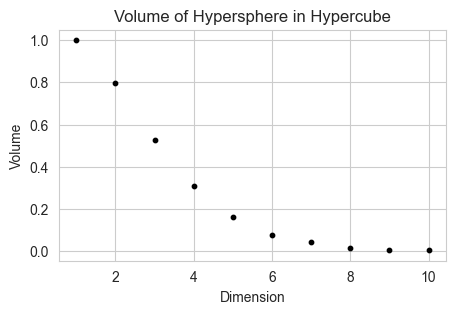

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import numpy.random as npr

npr.seed(123)
# Getting volumes of hyperspheres in hypercubes using Monte Carlo Methods

def hypersphere_volume(d, n):
    x = npr.uniform(-1, 1, (n, d))
    r = np.sqrt(np.sum(x**2, axis=1))
    correct_samples = x[r <= 1]
    return len(correct_samples) / n

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
n = 10000
for d in range(1, 11):
    ax.scatter(d, hypersphere_volume(d, n), s = 10 ,color='black')
ax.set_xlabel('Dimension')
ax.set_ylabel('Volume')
ax.set_title('Volume of Hypersphere in Hypercube')


3. All points are far away from each other

In higher dimensions, the points on average become further and further away from the center of the hypercube, as well as away from each other. Here we can also see in the plot, the average distance between points is $\frac{1}{2} \sqrt{D}$

Text(0.5, 1.0, 'Distance of Uniform Random Points in Hypercube')

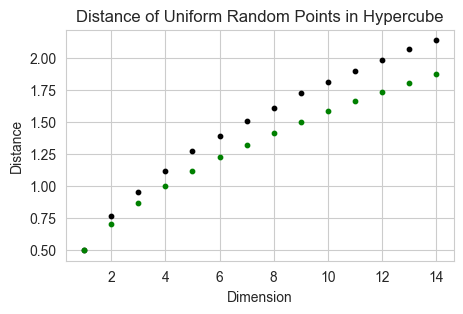

In [24]:
# Distance of uniform random points in a hypercube
def distance(d, n):
    x = npr.uniform(-1, 1, (n, d))
    r = np.sqrt(np.sum(x**2, axis=1))
    return np.mean(r)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
n = 2000; list = []
for d in range(1, 15):
    ax.scatter(d, distance(d, n), s = 10, color='black')
    ax.scatter(d, 0.5*(d)**(0.5), s = 10, color='green')
ax.set_xlabel('Dimension')
ax.set_ylabel('Distance')
ax.set_title('Distance of Uniform Random Points in Hypercube')

## Typical Set

The neighborhood immediately around the mode features large densities, but in more than a few dimensions the small volume of that neighborhood prevents it from having much contribution to any expectation. On the other hand, the complimentary neighborhood far away from the mode features a much larger volume, but the vanishing densities lead to similarly negligible contributions expectations.

The only significant contributions come from the neighborhood between these two extremes known as the **typical set**.

As we increase the dimensions D, the spaces where both densities and volume are big enough grow more and more narrow, and the only significant contributions to the Expectation comes from the Typical Set. Thus, we can accurately estimate expectations by averaging over the typical set instead of the entirety of parameter space.

One way to understand this is the following example:

Let us take the example of $\pi(x) = $ a normal distribution in D dimensions and try to find the value of $\pi(q) dq$ 

```{figure} ../images/Simulation/typical_set.jpg
---
name: Typical_Set
---
Typical Set
```

Hense, for a multivariate normal distribution,

$$
\pi(q) dq \propto e^{-r^{2}} r^{d-1} dr
$$

We will plot one and see the distance of typical sets for higher dimensions

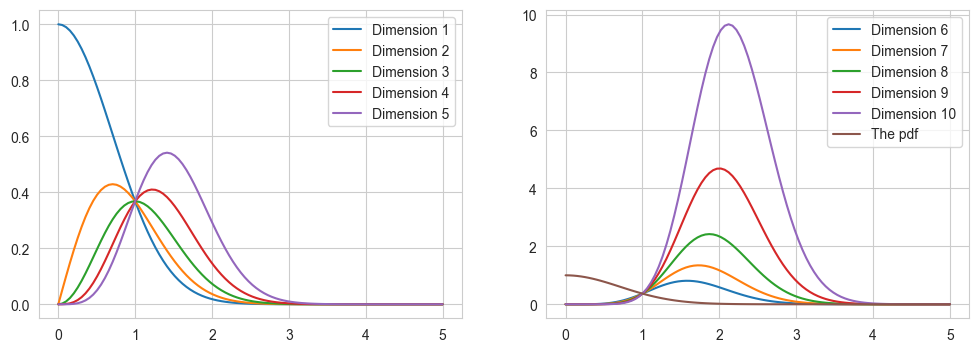

In [25]:
# Plotting values of e-r2 for different values of x
x = np.linspace(0, 5, 100)
y = np.exp(-x**2)

def targetf(x,n):
    return (x**n)*np.exp(-x**2)

fig, ax = plt.subplots(1,2, figsize = (12,4))

for i in range(0,5):
    ax[0].plot(x, targetf(x,i), label = "Dimension "+str(i+1))
ax[0].legend()

for i in range(5,10):
    ax[1].plot(x, targetf(x,i), label = "Dimension "+str(i+1))
ax[1].plot(x, targetf(x,0), label = "The pdf")
ax[1].legend()

This plot shows that the bulk of the integrand ($\pi(q) dq $) for the integral lies in a small region away from the mode. We can also simulate a multivariate normal distribution and confirm that the sample distance does not peak at the mode (which it should had if we were only taking the pdf into account).

[]

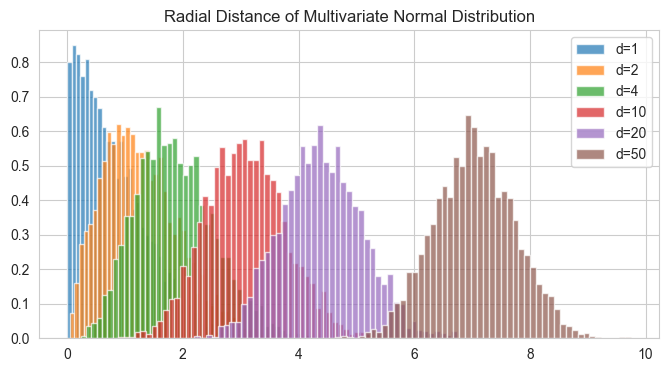

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# d dimensional normal distribution
def normal_dist(d, n):
    x = np.random.normal(0, 1, (n, d))
    r = np.sqrt(np.sum(x**2, axis=1))
    return r

d = [1, 2, 4, 10, 20, 50]; n = 3000
for i in d:
    ax.hist(normal_dist(i, n), bins=50, density=True, alpha = 0.7, label='d='+str(i))
ax.legend()
ax.set_title('Radial Distance of Multivariate Normal Distribution')
plt.plot()


This is a large deviation from our original idea of how data would behave and a very important one to understand.

**Important to Understand**

When we look at a 1d or 2d normal distribution, we think that if we take a lot of samples, the samples would peak at the mode (say zero), and then lesser and lesser samples away from the mode, but look at this radial distance plot (for d = 20), hardly any samples have been picked which have $r < 2$, far from the pdf peak.

So, the pdf is indeed like the 1d or 2d pdf which peaks at the mode and decays outwards, but when you actually sample out the samples most of the samples will be away, in a specific Typical Set.

## Geometric Look at MCMC

We can now take a Geometric look at the MCMC method, and how it goes well into the Typical Set, and how it does not.

We now understand that we need algorithms that explore the typical set to get the correct value for the Expectation, and the simplest one of them is the MCMC algorithms.

Markov chain Monte Carlo uses a Markov chain to stochastically explore the typical set, generating a random grid across the region of high probability from which we can construct accurate expectation estimates. 

Another definition of a Mcmc chain for a target distribution $T(q|q^{\prime})$ can be:

$$
\pi(q) = \int_{Q} d q^{\prime} \pi (q^{\prime}) T(q|q^{\prime}) 
$$

which simply says that if chain element $q^{\prime}$ is distributed acc to the target distribution $\pi()x$, then 

$$
p(q|q^{\prime}) = \pi(q^{\prime}) T(q|q^{\prime})
$$

which on marginalising for any $q^{\prime}$ gives:

$$
p(q) = \int_{Q} p(q|q^{\prime}) d q^{\prime} = \pi(q)
$$

I.e all samples are now from the target distribution.

Given sufficient time, the history of the Markov chain, {q0,...,qN}, denoted samples generated by the Markov chain, becomes a convenient quantification of the typical set, and Monte Carlo Estimators average a given function over these samples to approximate the Evidence.

$$
\frac{1}{N} \sum_{n = 1}{N} f(q_n) \sim \mathcal{N}( \mathbb{E_{\pi}}[f], \sqrt{\frac{Var_{\pi}[f]}{N}} ) 
$$

But, as the samples are correlated in our case, the central theorem changes to 

$$
\frac{1}{N} \sum_{n = 1}{N} f(q_n) \sim \mathcal{N}( \mathbb{E_{\pi}}[f], \sqrt{\frac{Var_{\pi}[f]}{ESS}})
$$

and ESS is the effective sample size $= \frac{M}{(1+2 \sum_{k = 1}^{M} \rho_k)}$ 

introduce evidence and mcmc, and central limit theorem , mcmc modified central limit theorem.


### Ideal Behaviour of MCMC

In the ideal behaviour the MCMC markov chain has 3 phases

1. In the first phase the Markov chain converges towards the typical set from its initial position in parameter space while the Markov chain Monte Carlo estimators suffer from strong biases.

2. In the secound phase the Markov chain has finally entered the typical set and persists along it till it completes one trip around it. Now the approximated Evidence is much closer the actual one.

3.  The third phase consists of all subsequent exploration where the Markov chain refines its exploration of the typical set and the precision of the Markov chain Monte Carlo estimators improves, albeit at a slower rate

```{figure} ../images/Simulation/Mcmc_behavior.png
---
height: 450px
width: 400px
name: MCMC_behavior
---
Ideal Behaviour of MCMC
```

Image Credits: A Conceptual Introduction to Hamiltonian Monte Carlo, Michael Betancourt

Hense, a common practise is to warm up the chain and throw away the first half of the samples. This idealised case shows the MCMC should work in theory (rigorous proof or asymptotic correctness), but the algorithm has a lot of problems in High Dimensions.
There are lot of cases in which the chain behaves pathologically due to high curvature but an even more concerning issue is the fact that, In higher dimensions the acceptance rate of the chain becomes vanishingly small making the chain dead. We will now look more into that aspect.


**MCMC is Bad at Evidence Estimation**

In the previous chapter on Evidence analysis, I said that we use other methods as MCMC is not good at evidence analysis, and this is indeed very true. I was trying to code up the above image but the Evidences of MCMC, just does not converge and goes in random directions, see the last code.


### MCMC High Dimensional Issues

While MCMC is produces and asymptotically unbiased estimate of Expectation, it does not work well in High Dimenstional Spaces.

 The main reason being that as the dimension of the target distribution increases, the volume exterior to the typical set overwhelms the volume interior to the typical set, and almost every Random Walk Metropolis proposal will produce a point on the outside of the typical set. The density of these points, however, is so small, that the acceptance probability becomes negligible. In this case almost all of the proposals will be rejected and the resulting Markov chain will only rarely move. We can induce a larger acceptance probability by shrinking the size of the proposal to stay within the typical set but those small jumps will move the Markov chain extremely slowly.

Regardless of how we tune the covariance of the Random Walk Metropolis proposal or the particular details of the target distribution, the resulting Markov chain will explore the typical set extremely slowly in all but the lowest dimensional spaces.

We can see through the figure ([credits](http://chi-feng.github.io/mcmc-demo/app.html?algorithm=RandomWalkMH&target=banana)), that alot of points which we take randomly will lie outside the typical set, hense low acceptance.

```{figure} ../images/Simulation/Low_acceptance.png
---
height: 300px
width: 300px
name: Low_acceptance
---
Low Acceptance
```

Also note that as we increase the dimensions, most of the samples we take will also be concentrated in the outer circle compltely diminshing our acceptance.

Thus we will have to use a stratergy that works with the geometery of the Typical Set rather than merely guessin our next step.


### MCMC for Expectation estimation

One can see, the final Expectations are not matching at all.

Text(0.5, 1.0, 'Evidence Estimation using MCMC')

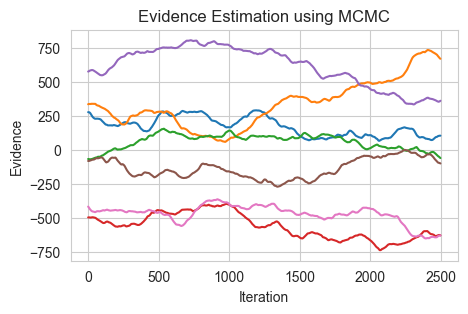

In [130]:
# Trying out mcmc for evidence estimation

def log_target(theta):
    return -np.sum(theta**2)/2

def log_MHsample(theta0, n, logtarget, drawproposal, seed = 123):
    npr.seed(seed)
    theta = theta0
    thetas = np.zeros((n,2))
    accepts = 0
    for i in range(n):
        theta_prop = drawproposal(theta)
        if np.log(npr.rand()) < logtarget(theta_prop) - logtarget(theta):
            theta = theta_prop
            accepts += 1
        thetas[i] = theta
    return thetas, accepts/n

n = 10000
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
seeds = [1, 2, 3, 4, 5, 6, 7]
for seed in seeds:
    theta, accr = log_MHsample(np.array([seed/2, seed*3]), n, log_target,
                                    lambda theta: theta + 0.5*npr.uniform(-1,1,2), seed = seed)
    # Calculating the evidence
    def f(theta):
        return np.sum(theta)/2

    Evidence = np.mean(f(theta[int(n/2):])); evidences = []
    for i in range(int(3*n/4), n):
        evidences.append(np.mean(f(theta[int(n/2):i])))
    evidences = np.array(evidences)
    ax.plot(evidences)

ax.set_xlabel('Iteration')
ax.set_ylabel('Evidence')
ax.set_title('Evidence Estimation using MCMC')

Ideal MCMC behaviour, with fig 7

Pathological behoaviours and issues in MCMC due to proposal rejection



after this, foundations of HMC, gradients, how the gradients are shifted on using more variables, its main algo, simplified example, further discussion.
